# PROJETO 2 - Análise Exploratória de Dados

https://www.ibge.gov.br/cidades-e-estados.html?view=municipio

<img src = "Captura de Tela (16).png">

In [1]:
# Importando as bibliotecas que serão utilizadas no trabalho

import pandas as pd #manipulação do dataframe
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #padronização
import seaborn as sns
import math
import statsmodels.api as sm
import pylab as py
import random
import plotly.express as px

In [173]:
# Lendo o dataset Cidades por meio do Pandas 
df = pd.read_csv('DF_Cidades.csv')

<img src = "Captura de Tela (17).png">

In [172]:
# Visualizando o dataset Cidades
display(df)

,codigo,cidade,prefeito,gentilico,area_territorial,populacao_estimada,densidade_demografica,escolarizacao,idhm,mortalidade_infantil,receitas_realizadas,despesas_empenhadas,pib
0,2300101,Abaiara,AFONSO TAVARES LEITE,abaiarense,180.833,11965,58.69,96.7,0.628,19.87,29043.96,26827.90,9158.04
1,2300150,Acarape,FRANCISCO EDILBERTO BESERRA BARROSO,acarapense,130.002,15140,98.52,96.8,0.606,5.35,38762.54,36800.47,10317.47
2,2300200,Acaraú,ANA FLÁVIA RIBEIRO MONTEIRO,acarauense,842.471,63556,68.31,96.8,0.601,5.92,132656.39,109899.30,13261.89
3,2300309,Acopiara,ANTÔNIO ALMEIDA NETO,acopiarense,2254.279,54687,22.58,97.2,0.595,20.18,153148.71,125356.17,9432.25
4,2300408,Aiuaba,RAMILSON ARAUJO MORAES,aiuabense,2438.563,17584,6.66,97.5,0.569,15.08,37794.63,33776.93,8642.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2313807,Uruburetama,FRANCISCO ALDIR CHAVES DA SILVA,uruburetamense,99.400,22223,203.61,95.9,0.639,14.16,46252.58,42868.59,12349.85
178,2313906,Uruoca,JAN KENNEDY PAIVA AQUINO,uruoquense,697.683,13988,18.49,97.7,0.566,18.52,36175.66,34549.31,13874.25
179,2313955,Varjota,FRANCISCO ELMO BEZERRA MONTE,varjotense,179.239,18520,98.07,96.6,0.611,7.41,51275.61,47814.73,19390.59
180,2314003,Várzea Alegre,JOSÉ HELDER MÁXIMO DE CARVALHO,varzea-alegrense,829.976,41078,45.99,97.0,0.629,10.68,79368.16,71300.30,10609.61


### Notas:
**- Escolarização 6 a 14 anos:** [população residente no município de 6 a 14 anos de idade matriculada no ensino regular/total de população residente no município de 6 a 14 anos de idade] x 100

**- População estimada:** para 'dúvidas e contestações' acesse https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=o-que-e

### Fontes:
**- Área Territorial:** Área territorial brasileira 2020. Rio de Janeiro: IBGE, 2021

**- População estimada:** IBGE, Diretoria de Pesquisas, Coordenação de População e Indicadores Sociais, Estimativas da população residente com data de referência 1o de julho de 2020

**- Densidade demográfica:** IBGE, Censo Demográfico 2010, Área territorial brasileira. Rio de Janeiro: IBGE, 2011
**- Escolarização 6 a 14 anos:** IBGE, Censo Demográfico 2010

**- IDHM Índice de desenvolvimento humano municipal:** Programa das Nações Unidas para o Desenvolvimento - PNUD

**- Mortalidade infantil:** Ministério da Saúde, Departamento de Informática do Sistema Único de Saúde - DATASUS 2017

**- Receitas realizadas:** Contas anuais. Receitas orçamentárias realizadas (Anexo I-C) 2017 e Despesas orçamentárias empenhadas (Anexo I-D) 2017. In: Brasil. Secretaria do Tesouro Nacional, Siconfi: Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro. Brasília, DF, [2018]. Disponível em: https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf. Acesso em: set. 2018

**- Despesas empenhadas:** Contas anuais. Receitas orçamentárias realizadas (Anexo I-C) 2017 e Despesas orçamentárias empenhadas (Anexo I-D) 2017. In: Brasil. Secretaria do Tesouro Nacional, Siconfi: Sistema de Informações Contábeis e Fiscais do Setor Público Brasileiro. Brasília, DF, [2018]. Disponível em: https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf. Acesso em: set. 2018

**- PIB per capita:** IBGE, em parceria com os Órgãos Estaduais de Estatística, Secretarias Estaduais de Governo e Superintendência da Zona Franca de Manaus - SUFRAMA

# Análise Descritiva

In [176]:
# Tipos das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   codigo                 182 non-null    int64  
 1   cidade                 182 non-null    object 
 2   prefeito               182 non-null    object 
 3   gentilico              182 non-null    object 
 4   area_territorial       182 non-null    float64
 5   populacao_estimada     182 non-null    int64  
 6   densidade_demografica  182 non-null    float64
 7   escolarizacao          182 non-null    float64
 8   idhm                   182 non-null    float64
 9   mortalidade_infantil   169 non-null    float64
 10  receitas_realizadas    182 non-null    float64
 11  despesas_empenhadas    182 non-null    float64
 12  pib                    182 non-null    float64
dtypes: float64(8), int64(2), object(3)
memory usage: 18.6+ KB


In [5]:
df.shape

(182, 13)

In [177]:
# Visualizando o nome das colunas/atributos
df.columns

Index(['codigo', 'cidade', 'prefeito', 'gentilico', 'area_territorial',
       'populacao_estimada', 'densidade_demografica', 'escolarizacao', 'idhm',
       'mortalidade_infantil', 'receitas_realizadas', 'despesas_empenhadas',
       'pib'],
      dtype='object')

### Área Territorial

In [10]:
# Medidas Resumo da Variável Area Territorial
df['area_territorial'].describe()

count     182.000000
mean      811.805203
std       754.792755
min        72.675000
25%       291.031000
50%       610.628500
75%       991.479000
max      4262.293000
Name: area_territorial, dtype: float64

In [161]:
#Boxplot da variável area_territorial
px.box(df, x = 'area_territorial', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



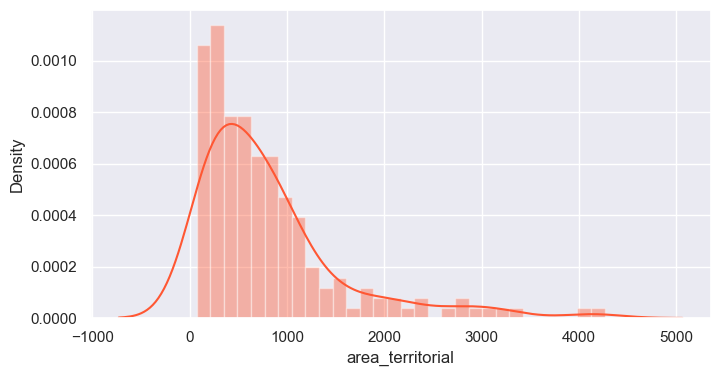

In [134]:
# Analisando a distribuição da variável area_territorial

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['area_territorial'], bins=30, color = '#FF5733')
plt.show()

In [113]:
# Padronizando a variável area_territorial
z_area = stats.zscore(df['area_territorial'])

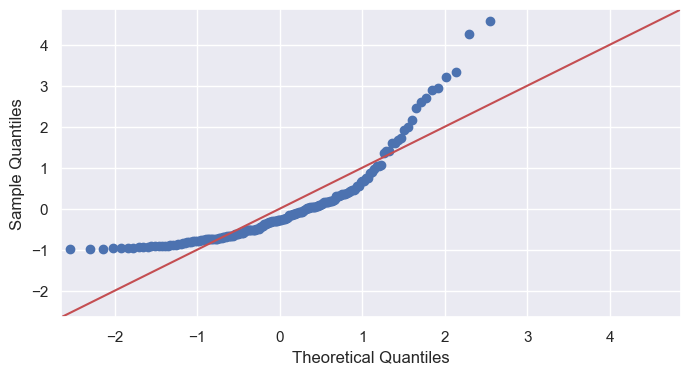

In [116]:
# Plotando o Qqplot da variável area_territorial
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_area, line ='45') 
py.show() 

In [178]:
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats

In [179]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [180]:
y_std = scipy.stats.zscore(df[4])
y_std = y_std.flatten()
y_std

KeyError: 4

In [ ]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        p = np.around(p, 5)
        p_values.append(p)    
        
        D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [ ]:
check_distribution(dist_names, y_std)

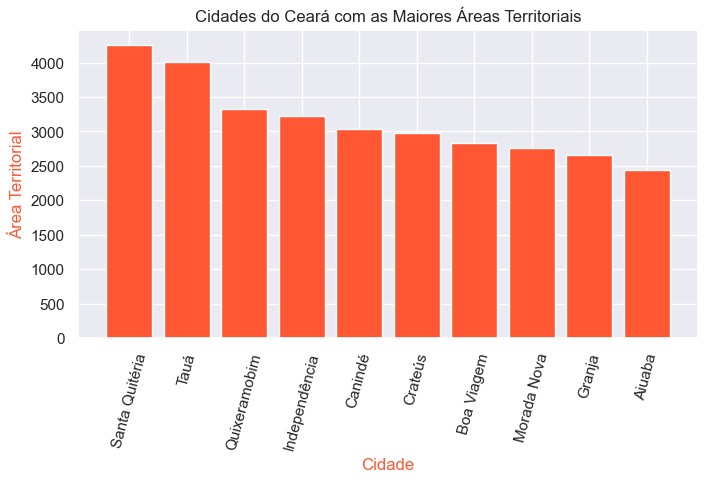

In [115]:
# Ordenar o dataset pela Área Territorial em ordem decrescente
df_sorted = df.sort_values('area_territorial', ascending=False)

# Selecionar as N cidades com os maiores Áreas Territoriais
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['area_territorial'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Áreas Territoriais')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Área Territorial', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

### População Estimada

In [118]:
# Medidas Resumo da Variável População Estimada
df['populacao_estimada'].describe()

count    1.820000e+02
mean     4.999058e+04
std      2.025529e+05
min      4.784000e+03
25%      1.423400e+04
50%      2.212050e+04
75%      4.103875e+04
max      2.703391e+06
Name: populacao_estimada, dtype: float64

In [120]:
# Boxplot da variável 'populacao_estimada'

px.box(df, x = 'populacao_estimada_log', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



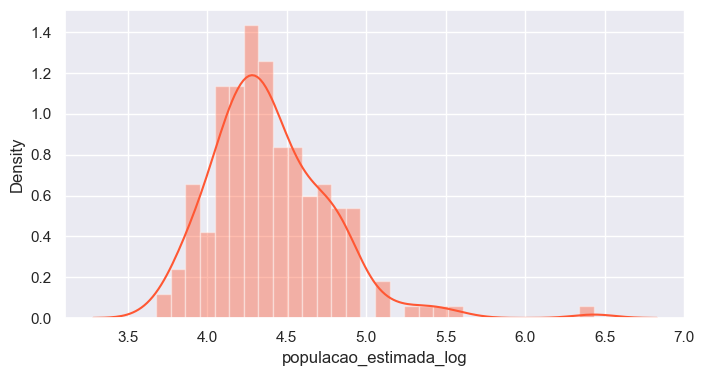

In [48]:
# Analisando a distribuição da variável populacao_estimada

# Converter as variáveis para escala logarítmica
df['populacao_estimada_log'] = np.log10(df['populacao_estimada'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['populacao_estimada_log'], bins=30, color = '#FF5733')
plt.show()

In [106]:
# Padronizando a variável populacao_estimada
z_pop_est = stats.zscore(df['populacao_estimada_log'])

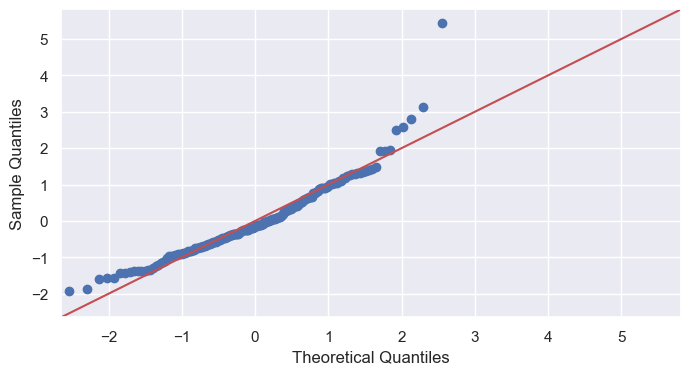

In [107]:
# Plotando o Qqplot da variável populacao_estimada
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_pop_est, line ='45') 
py.show() 

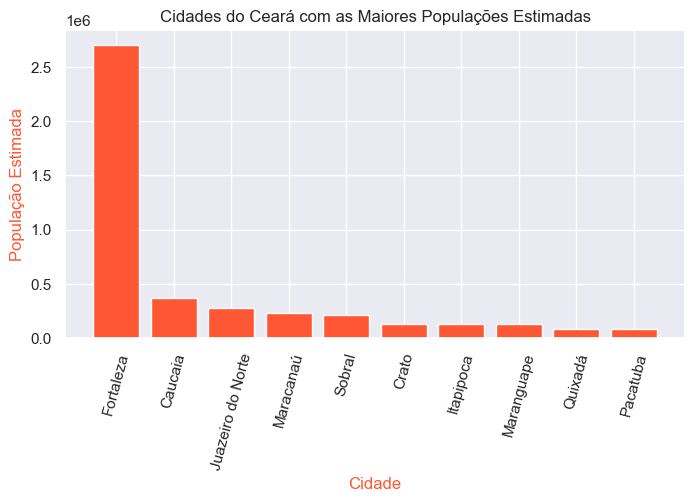

In [47]:
# Ordenar o dataset pelo População Estimada em ordem decrescente
df_sorted = df.sort_values('populacao_estimada', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['populacao_estimada'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Populações Estimadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('População Estimada', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

### Densidade Demográfica

In [16]:
# Medidas Resumo da Variável Densidade Demográfica
df['densidade_demografica'].describe()

count     182.000000
mean      115.034615
std       597.323469
min         6.660000
25%        22.460000
50%        37.450000
75%        68.992500
max      7786.440000
Name: densidade_demografica, dtype: float64

In [123]:
# Boxplot da variável 'densidade_demografica'

px.box(df, x = 'densidade_demografica', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



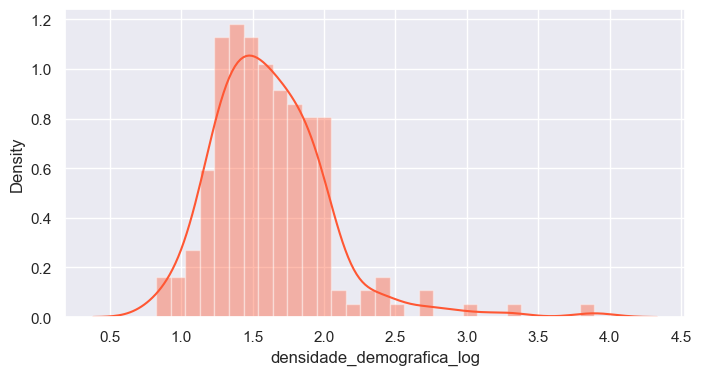

In [46]:
# Analisando a distribuição da variável densidade_demografica

# Converter as variáveis para escala logarítmica
df['densidade_demografica_log'] = np.log10(df['densidade_demografica'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['densidade_demografica_log'], bins=30, color = '#FF5733')
plt.show()

In [30]:
# Padronizando a variável densidade_demografica
z_dens_dem = stats.zscore(df['densidade_demografica'])

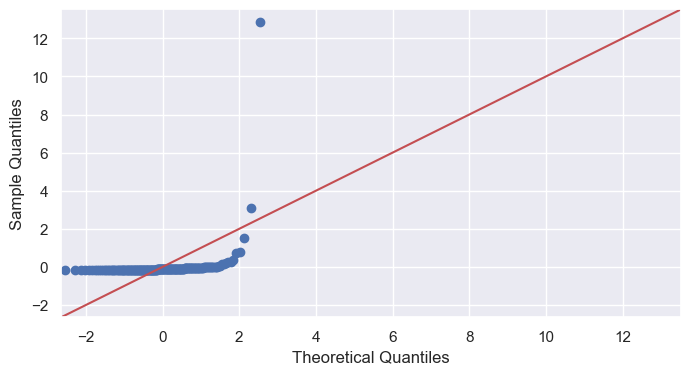

In [50]:
# Plotando o Qqplot da variável 'densidade_demografica'
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_dens_dem, line ='45') 
py.show() 

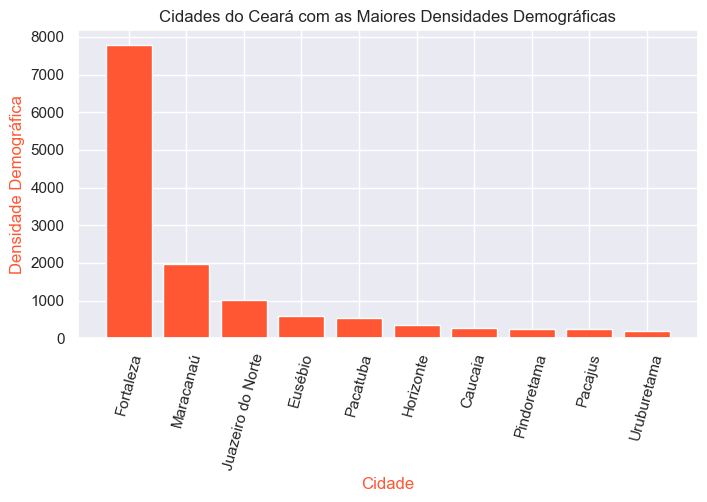

In [45]:
# Ordenar o dataset pelo População Estimada em ordem decrescente
df_sorted = df.sort_values('densidade_demografica', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['densidade_demografica'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Densidades Demográficas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Densidade Demográfica', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

### Escolarização

In [34]:
# Medidas Resumo da Variável Escolarização
df['escolarizacao'].describe()

count    182.000000
mean      97.273626
std        1.201365
min       91.700000
25%       96.700000
50%       97.500000
75%       98.000000
max       99.500000
Name: escolarizacao, dtype: float64

In [35]:
#  Boxplot da variável escolarização

px.box(df, x = 'escolarizacao', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



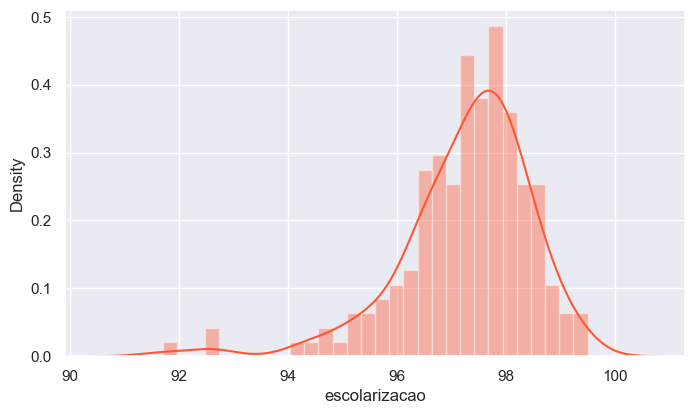

In [44]:
# Analisando a distribuição da variável escolarizacao

sns.set(rc={'figure.figsize':(8,4.5)})
sns.distplot(df['escolarizacao'], bins=30, color = '#FF5733')
plt.show()

In [36]:
# Padronizando a variável escolarizacao
z_esc = stats.zscore(df['escolarizacao'])

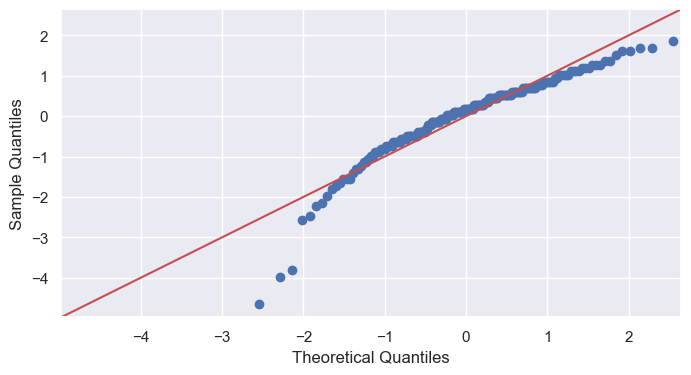

In [51]:
# Plotando o Qqplot da variável 'escolarizacao'
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_esc, line ='45') 
py.show() 

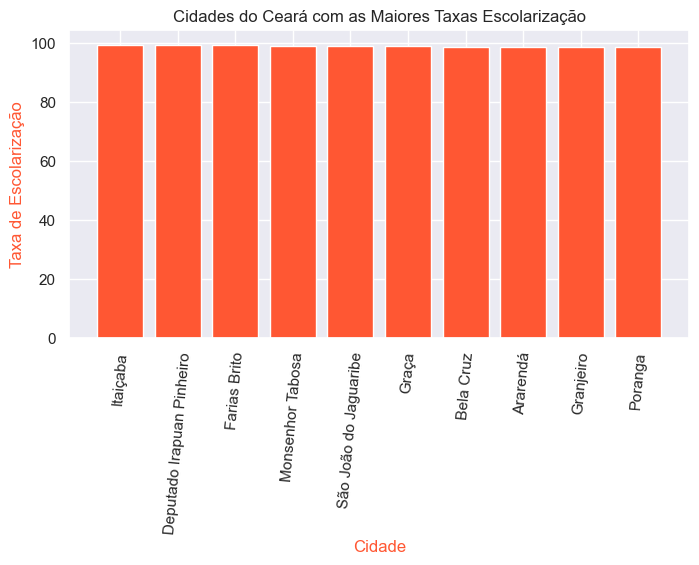

In [43]:
# Ordenar o dataset pela Escolarizaçaõ em ordem decrescente
df_sorted = df.sort_values('escolarizacao', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['escolarizacao'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Taxas Escolarização')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Taxa de Escolarização', color = '#FF5733')
plt.xticks(rotation=85)

# Mostrar o gráfico
plt.show()

### IDHM (Índice de Desenvolvimento Humano Municipal)

In [52]:
# Medidas Resumo da Variável IDHM (Índice de Desenvolvimento Humano Municipal)
df['idhm'].describe()

count    182.000000
mean       0.616247
std        0.031517
min        0.540000
25%        0.598250
50%        0.612000
75%        0.632000
max        0.754000
Name: idhm, dtype: float64

In [54]:
# Boxplot da variável idhm
px.box(df, x = 'idhm', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



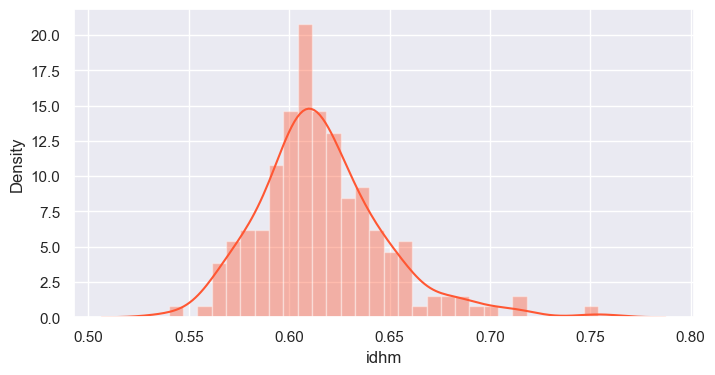

In [55]:
# Analisando a distribuição das variável idhm

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['idhm'], bins=30, color = '#FF5733')
plt.show()

In [56]:
# Padronizando a variável 'idhm'
z_idhm = stats.zscore(df['idhm'])

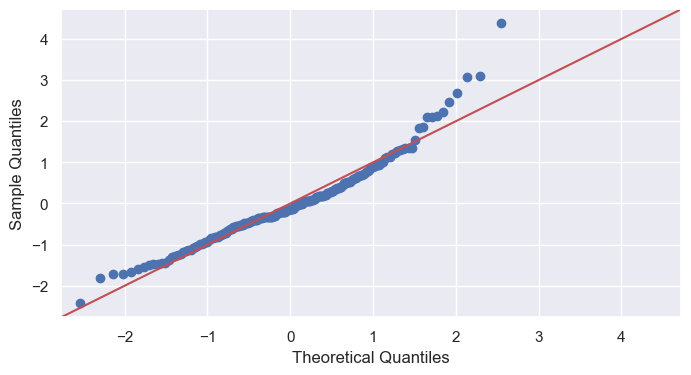

In [69]:
# Plotando o Qqplot da variável populacao_estimada
sm.qqplot(z_idhm, line ='45') 
sns.set(rc={'figure.figsize':(8,4)})
py.show() 

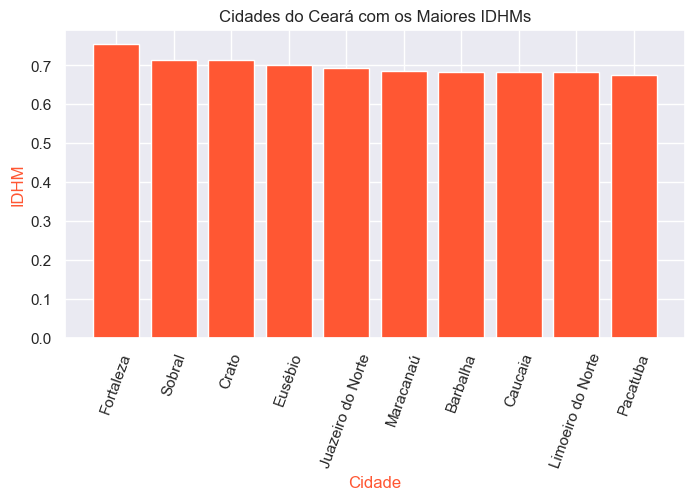

In [63]:
# Ordenar o dataset pelo IDHM em ordem decrescente
df_sorted = df.sort_values('idhm', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(top_cidades['cidade'], top_cidades['idhm'], color = '#FF5733')

# Personalizar o gráfico
plt.title("Cidades do Ceará com os Maiores IDHMs")
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('IDHM', color = '#FF5733')
plt.xticks(rotation=70)

# Mostrar o gráfico
plt.show()

### Mortalidade Infantil

In [64]:
# Medidas Resumo da Variável IDHM (Índice de Desenvolvimento Humano Municipal)
df['mortalidade_infantil'].describe()

count    169.000000
mean      12.854793
std        6.657863
min        2.610000
25%        8.140000
50%       11.110000
75%       16.610000
max       32.610000
Name: mortalidade_infantil, dtype: float64

In [65]:
px.box(df, x = 'mortalidade_infantil', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



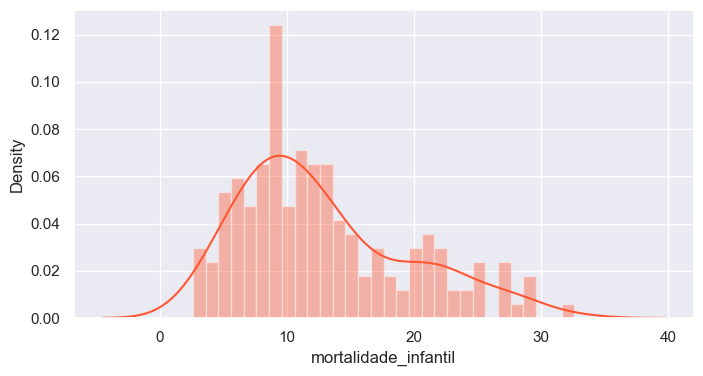

In [66]:
# Analisando a distribuição das variável mortalidade_infantil

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['mortalidade_infantil'], bins=30, color = '#FF5733')
plt.show()

In [67]:
# Padronizando a variável 'mortalidade_infantil'
z_mort_inf = stats.zscore(df['populacao_estimada'])

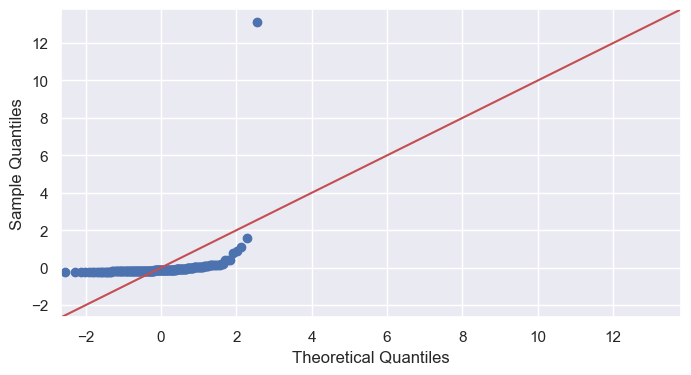

In [70]:
# Plotando o Qqplot da variável populacao_estimada
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_mort_inf, line ='45') 
py.show() 

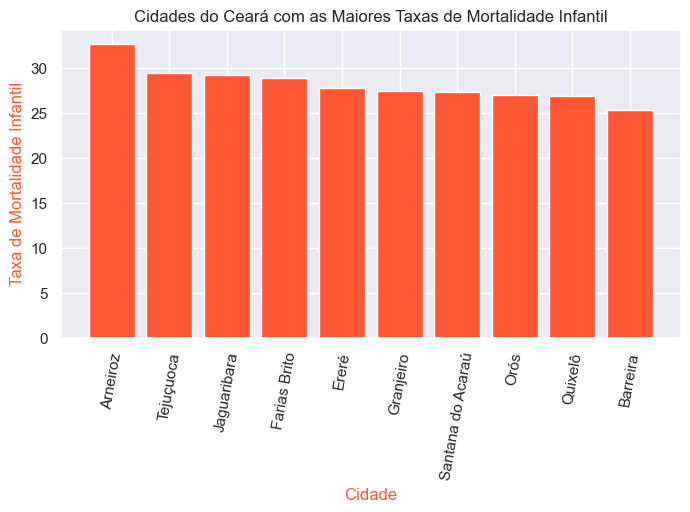

In [74]:
# Ordenar o dataset pela Mortalidade Infantil em ordem decrescente
df_sorted = df.sort_values('mortalidade_infantil', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['mortalidade_infantil'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Taxas de Mortalidade Infantil')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Taxa de Mortalidade Infantil', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

### Receitas Realizadas

In [75]:
# Medidas Resumo da Variável 'receitas_realizadas'
df['receitas_realizadas'].describe()

count    1.820000e+02
mean     1.211275e+05
std      5.091373e+05
min      1.151000e+01
25%      3.810370e+04
50%      5.237593e+04
75%      8.836731e+04
max      6.810527e+06
Name: receitas_realizadas, dtype: float64

In [76]:
px.box(df, x = 'receitas_realizadas', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



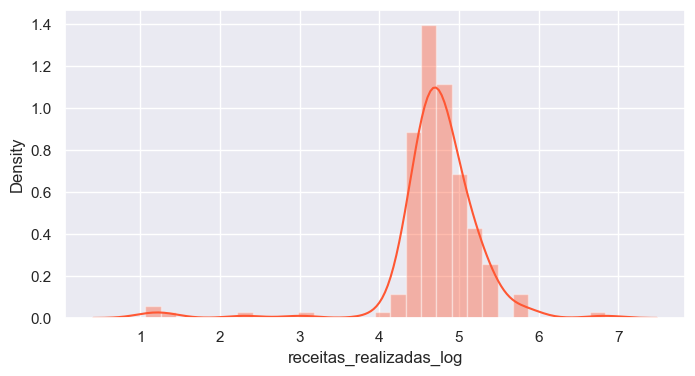

In [124]:
# Analisando a distribuição das variável receitas_realizadas

# Converter as variáveis para escala logarítmica
df['receitas_realizadas_log'] = np.log10(df['receitas_realizadas'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['receitas_realizadas_log'], bins=30, color = '#FF5733')
plt.show()

In [90]:
# Padronizando a variável receitas_realizadas
z_rec = stats.zscore(df['receitas_realizadas_log'])

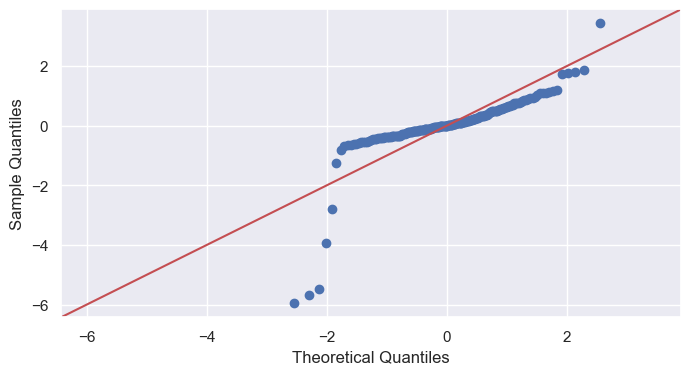

In [91]:
# Plotando o Qqplot da variável receitas_realizadas
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_rec, line ='45') 
py.show() 

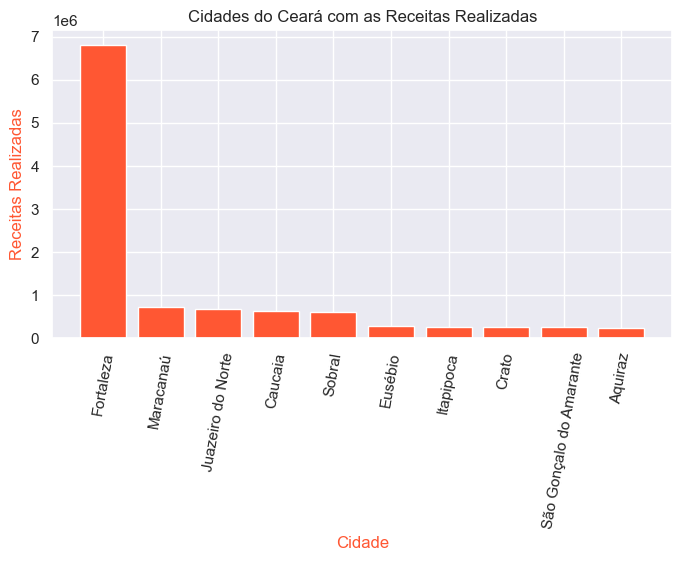

In [81]:
# Ordenar o dataset pelas Receitas Realizadas em ordem decrescente
df_sorted = df.sort_values('receitas_realizadas', ascending=False)

n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['receitas_realizadas'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Receitas Realizadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Receitas Realizadas', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

### Despesas Empenhadas

In [18]:
# Medidas Resumo da Variável receitas_realizadas
df['despesas_empenhadas'].describe()

count    1.820000e+02
mean     1.121160e+05
std      4.865141e+05
min      1.680449e+04
25%      3.381410e+04
50%      4.754151e+04
75%      8.215374e+04
max      6.525658e+06
Name: despesas_empenhadas, dtype: float64

In [82]:
px.box(df, x = 'despesas_empenhadas', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



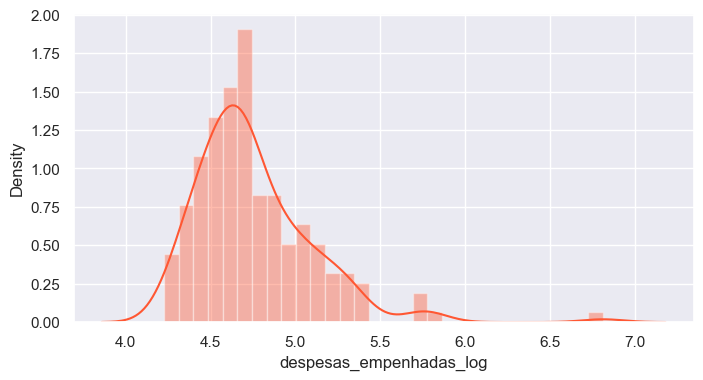

In [83]:
# Analisando a distribuição das variável despesas_empenhadas

# Converter as variáveis para escala logarítmica
df['despesas_empenhadas_log'] = np.log10(df['despesas_empenhadas'])

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(df['despesas_empenhadas_log'], bins=30, color = '#FF5733')
plt.show()

In [86]:
# Padronizando a variável despesas_empenhadas
z_desp = stats.zscore(df['despesas_empenhadas_log'])

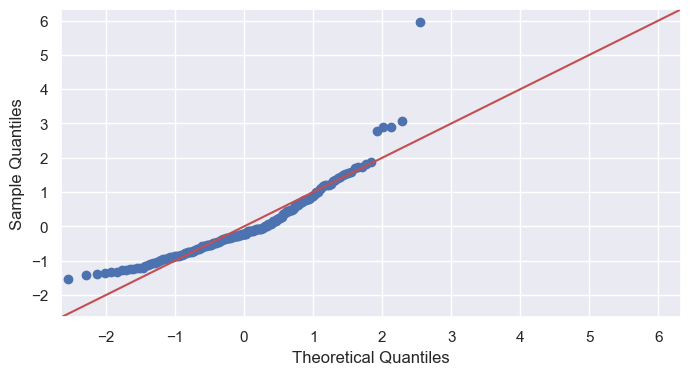

In [95]:
# Plotando o Qqplot da variável despesas_empenhadas
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_desp, line ='45') 
py.show() 

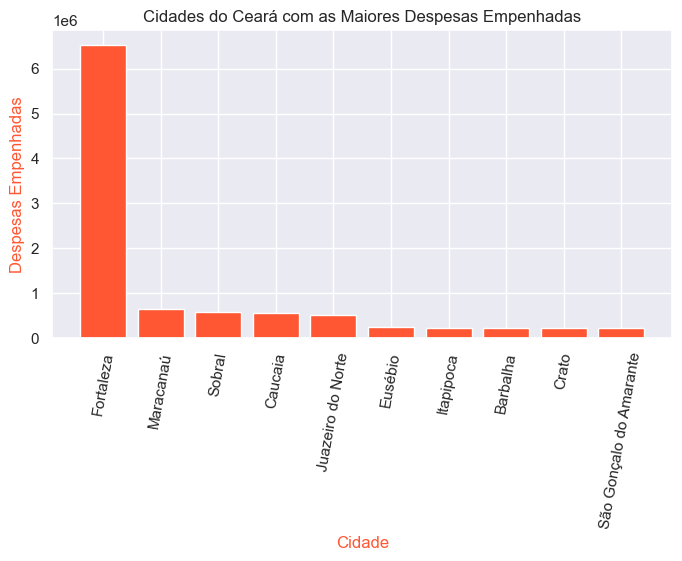

In [99]:
# Ordenar o dataset pelas Despesas Empenhadas em ordem decrescente
df_sorted = df.sort_values('despesas_empenhadas', ascending=False)

n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['despesas_empenhadas'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com as Maiores Despesas Empenhadas')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('Despesas Empenhadas', color = '#FF5733')
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()

### PIB (Produto Interno Bruto)

In [100]:
# Medidas Resumo da Variável PIB
df['pib'].describe()

count      182.000000
mean     12420.318022
std       8040.799837
min       6695.210000
25%       8668.630000
50%      10361.770000
75%      13033.630000
max      83473.110000
Name: pib, dtype: float64

In [101]:
# Boxplot da variável pib
px.box(df, x = 'pib', points = 'all')

C:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



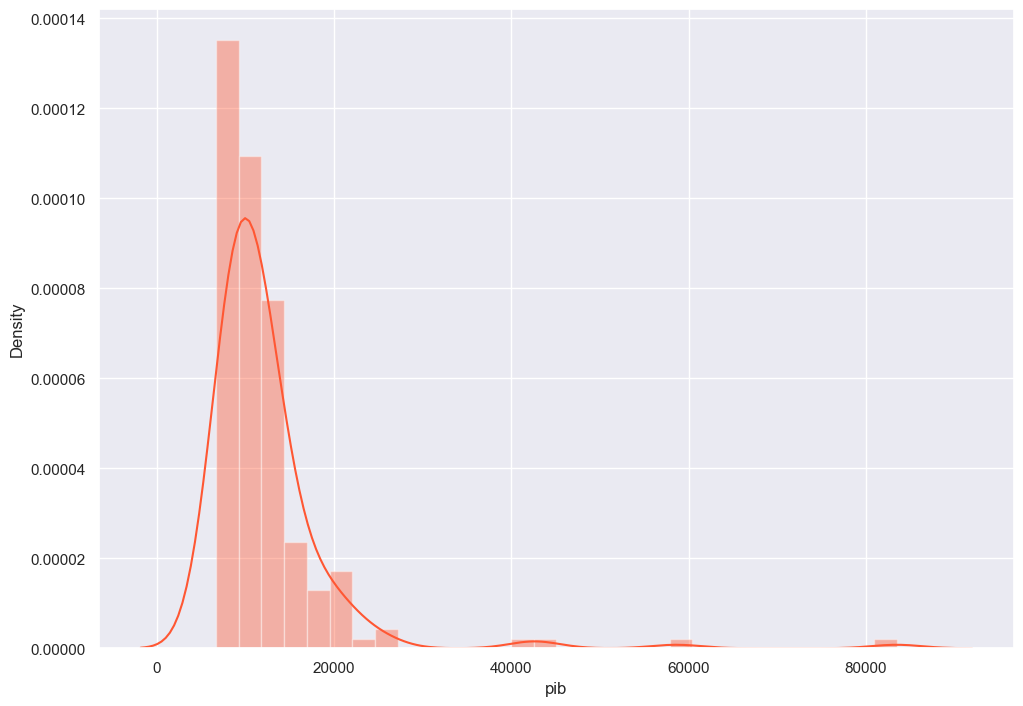

In [22]:
# Analisando a distribuição das variável pib

sns.set(rc={'figure.figsize':(11.8,8.3)})
sns.distplot(df['pib'], bins=30, color = '#FF5733')
plt.show()

In [102]:
# Padronizando a variável pib
z_pib = stats.zscore(df['pib'])

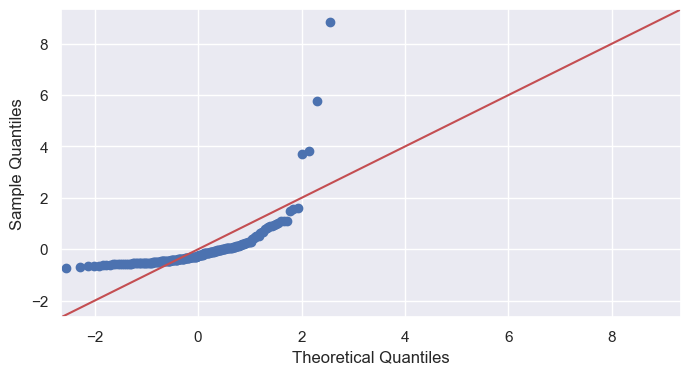

In [103]:
# Plotando o Qqplot da variável pib
sns.set(rc={'figure.figsize':(8,4)})
sm.qqplot(z_pib, line ='45') 
py.show() 

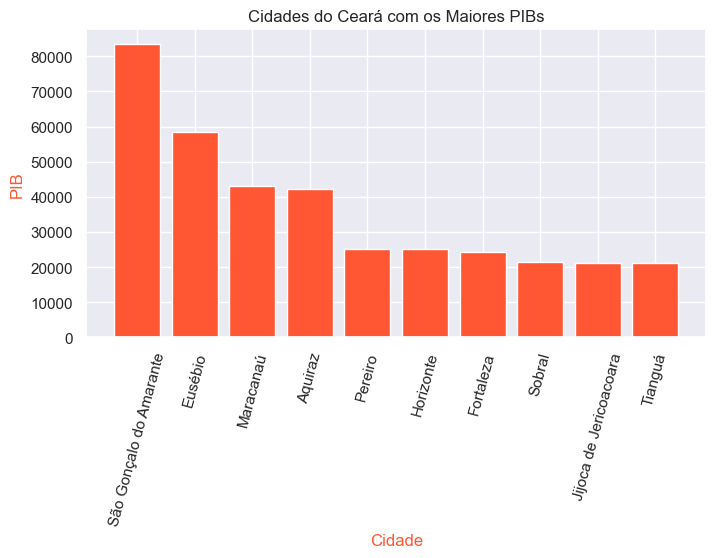

In [132]:
# Ordenar o dataset pelo PIB em ordem decrescente
df_sorted = df.sort_values('pib', ascending=False)

# Selecionar as N cidades com os maiores PIBs
n = 10  # Defina o número de cidades que você deseja incluir no gráfico
top_cidades = df_sorted.head(n)

# Criar o gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(top_cidades['cidade'], top_cidades['pib'], color = '#FF5733')

# Personalizar o gráfico
plt.title('Cidades do Ceará com os Maiores PIBs')
plt.xlabel('Cidade', color = '#FF5733')
plt.ylabel('PIB', color = '#FF5733')
plt.xticks(rotation=75)

# Mostrar o gráfico
plt.show()

# Correlação entre variáveis

In [51]:
# Medindo a correlação entre as variáveis
df[['receitas_realizadas', 'despesas_empenhadas']].corr()

,receitas_realizadas,despesas_empenhadas
receitas_realizadas,1.000000,0.999637
despesas_empenhadas,0.999637,1.000000


### Matriz de Correlação

In [174]:
# Lendo o dataset Cidades por meio do Pandas 
df = pd.read_csv('DF_Cidades.csv')

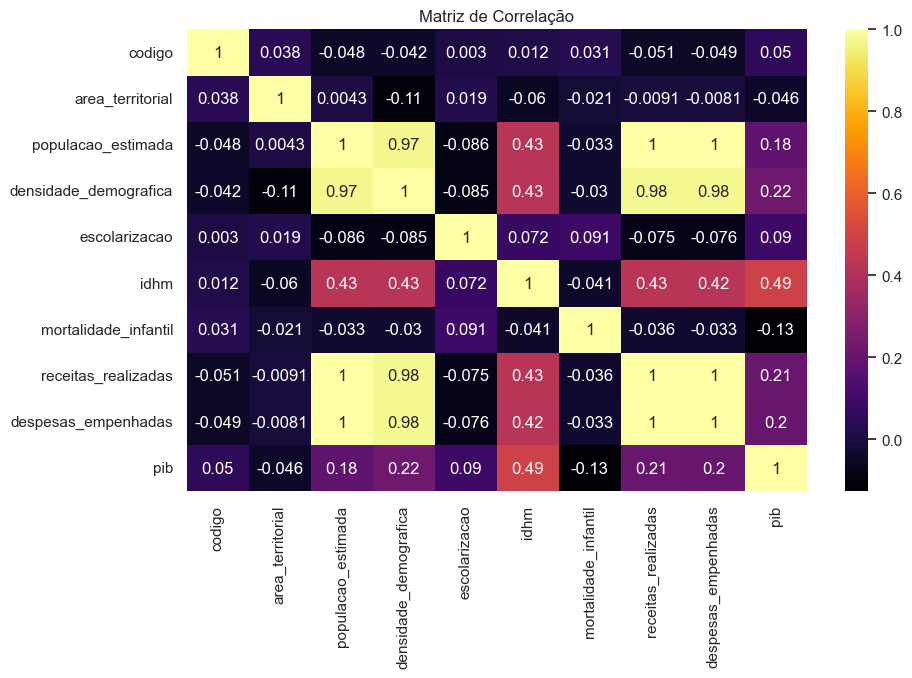

In [175]:
# Calcular a matriz de correlação
matriz_correlacao = df.corr()

# Criar o gráfico da matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(matriz_correlacao, annot=True, cmap='inferno')

# Personalizar o gráfico
plt.title('Matriz de Correlação')
plt.show()

### Gráficos de Dispersão

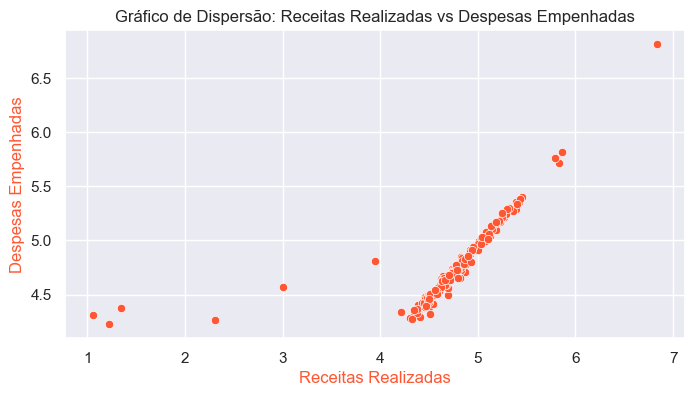

In [145]:
plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='receitas_realizadas_log', y='despesas_empenhadas_log', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Receitas Realizadas vs Despesas Empenhadas')
plt.xlabel('Receitas Realizadas', color = '#FF5733')
plt.ylabel('Despesas Empenhadas', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

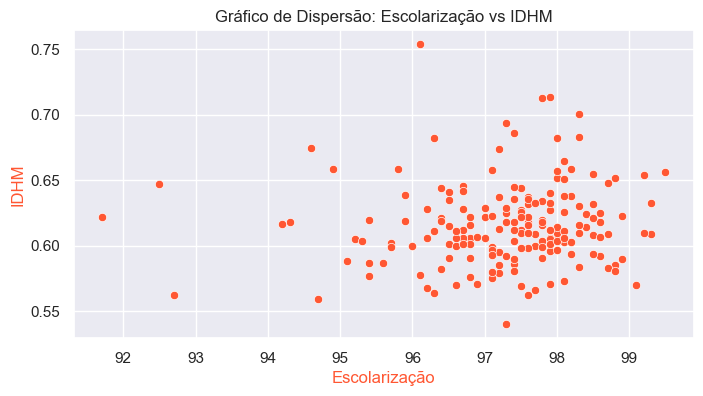

In [146]:
plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='escolarizacao', y='idhm', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Escolarização vs IDHM')
plt.xlabel('Escolarização', color = '#FF5733')
plt.ylabel('IDHM', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

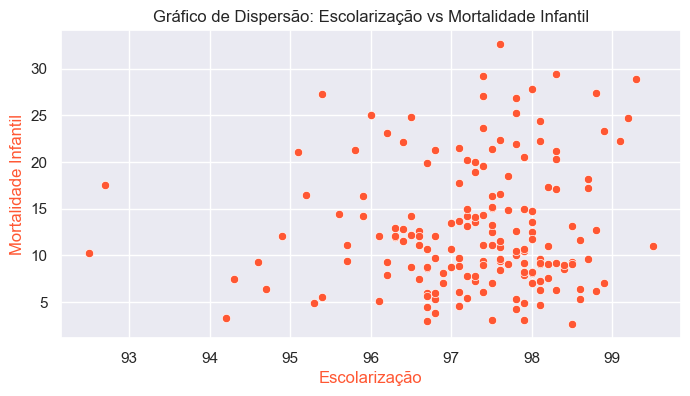

In [156]:
plt.figure(figsize=(8,4))  # Tamanho da figura
sns.scatterplot(data=df, x='escolarizacao', y='mortalidade_infantil', color = '#FF5733')

# Personalizar o gráfico de dispersão
plt.title('Gráfico de Dispersão: Escolarização vs Mortalidade Infantil')
plt.xlabel('Escolarização', color = '#FF5733')
plt.ylabel('Mortalidade Infantil', color = '#FF5733')

# Mostrar o gráfico de dispersão
plt.show()

# Mapa de Calor